# Heart Stroke Predction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Reading Data

In [2]:
patient_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
print("Number of patients details:" , len(patient_data))
patient_data.head()

Number of patients details: 5110


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 2. Data Analysis

<AxesSubplot:xlabel='stroke', ylabel='count'>

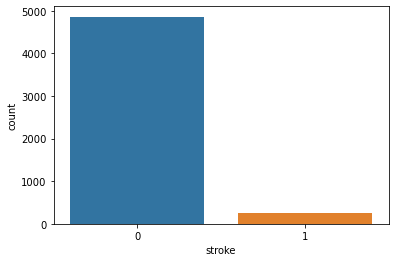

In [4]:
sns.countplot(x="stroke", data=patient_data)

<AxesSubplot:xlabel='stroke', ylabel='count'>

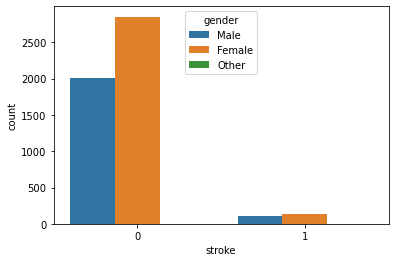

In [5]:
sns.countplot(x="stroke" ,hue="gender" , data=patient_data)

<AxesSubplot:xlabel='stroke', ylabel='count'>

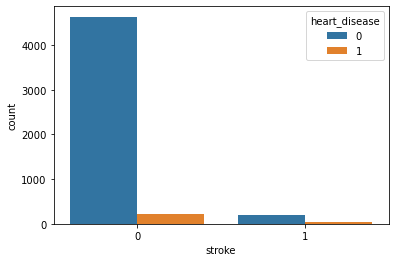

In [6]:
sns.countplot(x="stroke" ,hue="heart_disease" , data=patient_data)

<AxesSubplot:xlabel='stroke', ylabel='count'>

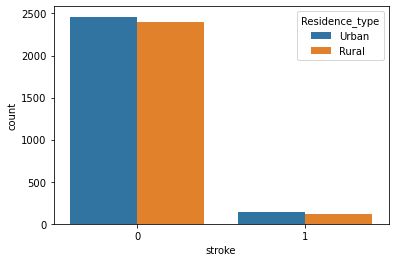

In [7]:
sns.countplot(x="stroke" ,hue="Residence_type" , data=patient_data)

<AxesSubplot:xlabel='stroke', ylabel='count'>

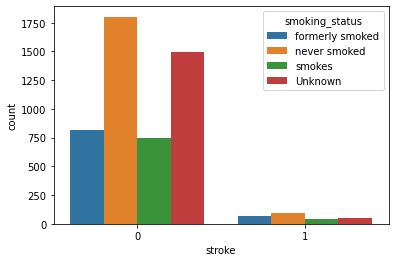

In [8]:
sns.countplot(x="stroke" ,hue="smoking_status" , data=patient_data)

<AxesSubplot:xlabel='stroke', ylabel='count'>

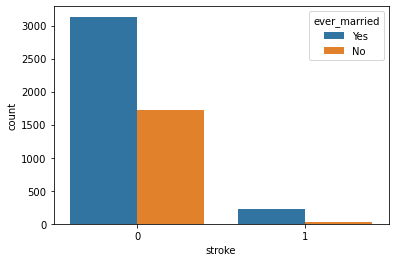

In [9]:
sns.countplot(x="stroke" ,hue="ever_married" , data=patient_data)

## 3. Data Cleaning

In [10]:
patient_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [11]:
patient_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
patient_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
# Making string type to categoical data

gender = pd.get_dummies(patient_data["gender"].values, drop_first=True)
married = pd.get_dummies(patient_data["ever_married"].values, drop_first=True)
work_type = pd.get_dummies(patient_data["work_type"].values, drop_first=True)
residence = pd.get_dummies(patient_data["Residence_type"].values, drop_first=True)
smoking = pd.get_dummies(patient_data["smoking_status"].values, drop_first=True)

In [14]:
patient_modified_data = pd.concat([patient_data, gender, married, work_type, residence, smoking] , axis=1)
patient_modified_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
Male                   0
Other                  0
Yes                    0
Never_worked           0
Private                0
Self-employed          0
children               0
Urban                  0
formerly smoked        0
never smoked           0
smokes                 0
dtype: int64

In [15]:
patient_modified_data.drop(["id", "gender" ,"ever_married", "work_type", "Residence_type", "smoking_status"  ] , axis=1 , inplace=True)
patient_modified_data.dropna(inplace=True)

## 4. Split the Dataset

In [16]:
X = patient_modified_data.drop("stroke" , axis = 1)
Y = patient_modified_data["stroke"].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [17]:
X_train.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
Male                 0
Other                0
Yes                  0
Never_worked         0
Private              0
Self-employed        0
children             0
Urban                0
formerly smoked      0
never smoked         0
smokes               0
dtype: int64

## 5. Modeling

In [21]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=1000)
logReg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [26]:
Y_predict = logReg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test , Y_predict)

array([[1165,    0],
       [  63,    0]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_predict)*100
print("Accuracy of the model: ", accuracy)

Accuracy of the model:  94.86970684039088
